In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel("/content/sample_data/IPL2023_data.xlsx")
data

,MATCH NO.,TEAM A,TEAM B,WON,TOSS WON,PLAYER OF THE MATCH,VENUE,POM TYPE,GW_vs_TW,POM_TEAM,TARGET,TOSS WINNER DECISION_FIELDING
0,1,CSK,GT,GT,GT,Rashid Khan,Narendra Modi Stadium,1,11,GT,178,1
1,2,PBKS,KKR,PBKS,KKR,Arshdeep Singh,Punjab Cricket Association Stadium,2,10,PBKS,191,1
2,3,LSG,DC,LSG,DC,Mark Wood,"Ekama Sports City,Lucknow",2,10,LSG,193,1
3,4,RR,SRH,RR,SRH,Jos Buttler,Rajiv Gandhi International Stadium,3,10,RR,203,1
4,5,MI,RCB,RCB,RCB,Faf du Plessis,M.Chinnaswamy Stadium,3,10,RCB,171,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,RCB,GT,GT,GT,Shubman Gill,M.Chinnaswamy Stadium,3,11,GT,197,1
70,71,CSK,GT,CSK,GT,Ruturaj Gaikwad,MA Chidambaram Stadium,3,10,CSK,172,1
71,72,MI,LSG,MI,MI,Akash Madhwal,MA Chidambaram Stadium,2,11,MI,182,0
72,73,GT,MI,GT,MI,Shubman Gill,Narendra Modi Stadium,3,10,GT,233,1


In [3]:
data.shape

(74, 12)

In [4]:
data.head()

,MATCH NO.,TEAM A,TEAM B,WON,TOSS WON,PLAYER OF THE MATCH,VENUE,POM TYPE,GW_vs_TW,POM_TEAM,TARGET,TOSS WINNER DECISION_FIELDING
0,1,CSK,GT,GT,GT,Rashid Khan,Narendra Modi Stadium,1,11,GT,178,1
1,2,PBKS,KKR,PBKS,KKR,Arshdeep Singh,Punjab Cricket Association Stadium,2,10,PBKS,191,1
2,3,LSG,DC,LSG,DC,Mark Wood,"Ekama Sports City,Lucknow",2,10,LSG,193,1
3,4,RR,SRH,RR,SRH,Jos Buttler,Rajiv Gandhi International Stadium,3,10,RR,203,1
4,5,MI,RCB,RCB,RCB,Faf du Plessis,M.Chinnaswamy Stadium,3,10,RCB,171,1


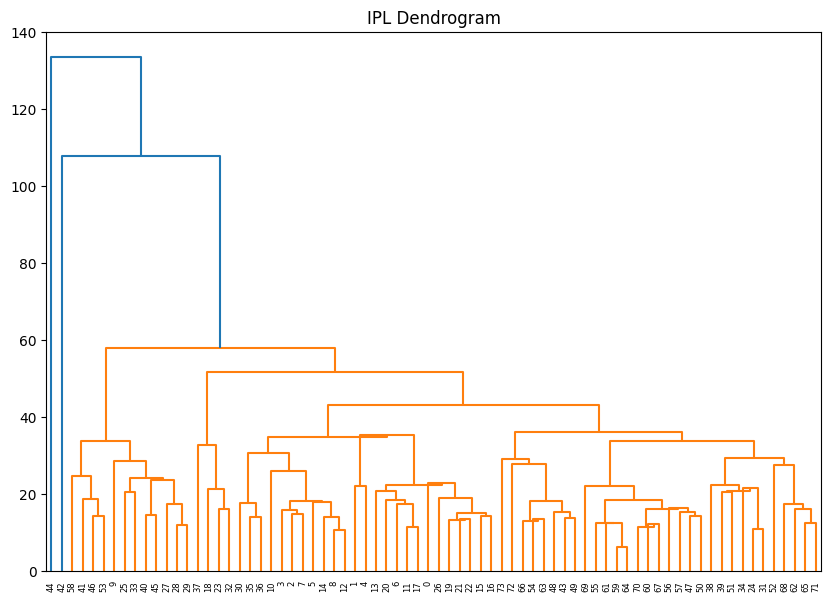

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])
import scipy.cluster.hierarchy as shc
linkage_matrix = shc.linkage(data, method='centroid')
plt.figure(figsize=(10, 7))
plt.title("IPL Dendrogram")
dendrogram = shc.dendrogram(linkage_matrix)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, linkage='average')
cluster1=cluster.fit_predict(data)

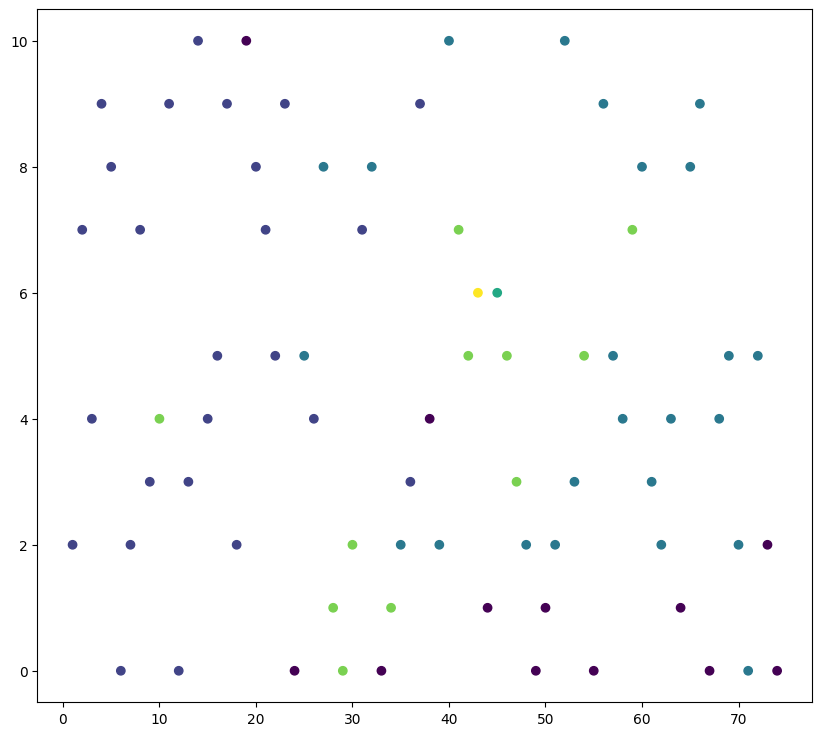

In [8]:
plt.figure(figsize=(10, 9))
plt.scatter(data.iloc[:,0], data.iloc[:,3], c=cluster.labels_)